# Using Classification ML technique Predict which customers are likely to purchase Organic products.

In [1]:
import pandas as pd #for data munging
import numpy as np # for mathematicla operations
import matplotlib.pyplot as plt # for visualization
import seaborn as sns# for visualization
%matplotlib inline

In [2]:
#read the dataset
data=pd.read_csv("D:/projects/imarticus projects code/Case Study 2_ Soliciting the Most Profitable Customers/Organic.csv")

In [3]:
data.head(5)

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [4]:
# structure of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [5]:
# no of Rows and column 
data.shape

(22223, 13)

In [6]:
# Missing value 
data.isnull().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
TargetAmt             0
dtype: int64

In [7]:
# dropping "DemCluster", "TargetAmt" colume because in object they mention not to add these colume
data.drop(["DemCluster", "TargetAmt"], axis = 1, inplace = True) 

In [8]:
# no of Rows and column 
data.shape# Missing value 
data.isnull().sum()

ID                    0
DemAffl            1085
DemAge             1508
DemClusterGroup     674
DemGender          2512
DemReg              465
DemTVReg            465
PromClass             0
PromSpend             0
PromTime            281
TargetBuy             0
dtype: int64

8.711893272778882
8.0
8.0


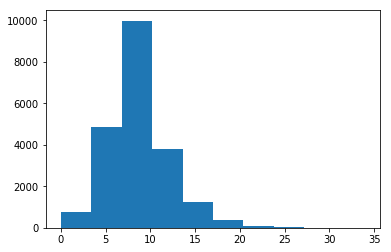

In [9]:
# plot histogram for DemAffl 
import pylab
pylab.figure()
pylab.hist(data.DemAffl[~np.isnan(data.DemAffl)]) # avoide NA values
pylab.show

# find mean, median and mode also
import statistics as st
print(st.mean(data.DemAffl[~np.isnan(data.DemAffl)]))
print(st.median(data.DemAffl[~np.isnan(data.DemAffl)]))
print(st.mode(data.DemAffl[~np.isnan(data.DemAffl)]))

In [10]:
data.DemAffl.value_counts()

8.0     2634
7.0     2588
9.0     2584
6.0     2234
10.0    2172
11.0    1676
5.0     1662
12.0    1241
4.0      983
13.0     856
14.0     594
3.0      533
15.0     403
16.0     245
2.0      200
17.0     145
18.0      89
19.0      71
20.0      59
21.0      36
1.0       36
22.0      25
23.0      17
24.0      15
25.0      13
26.0       6
0.0        6
27.0       5
30.0       3
29.0       3
31.0       2
34.0       1
28.0       1
Name: DemAffl, dtype: int64

In [11]:
# impute NA in place of 0, 31, 34  because in this collume contained scaled values from 1 to 30
data['DemAffl'].replace((0,31,34), np.nan, inplace= True)

In [12]:
# Impute missing valuse in "DemAffl" by median 
median_value_DemAffl=(st.median(data.DemAffl[~np.isnan(data.DemAffl)]))
data['DemAffl']=data['DemAffl'].fillna(median_value_DemAffl)

53.797151822350955
54.0
51.0


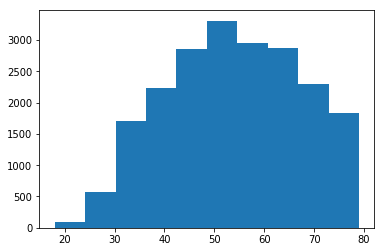

In [13]:
# plot histogram for age 
import pylab
pylab.figure()
pylab.hist(data.DemAge[~np.isnan(data.DemAge)]) # avoide NA values
pylab.show

# find mean, median and mode also
import statistics as st
print(st.mean(data.DemAge[~np.isnan(data.DemAge)]))
print(st.median(data.DemAge[~np.isnan(data.DemAge)]))
print(st.mode(data.DemAge[~np.isnan(data.DemAge)]))

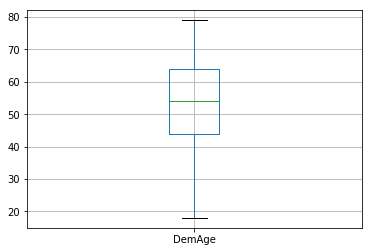

In [14]:
# Boxplot for checking outliers in DemAge
boxplot = data.boxplot(column=['DemAge'])

In [15]:
# Impute missing valuse in "DemAge" by median 
median_value_DemAge=(st.median(data.DemAge[~np.isnan(data.DemAge)]))
data['DemAge']=data['DemAge'].fillna(median_value_DemAge)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


C


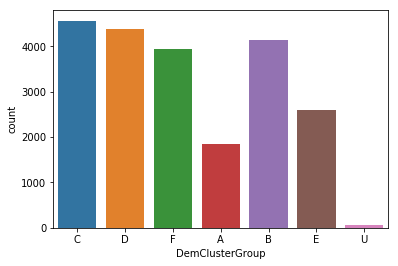

In [16]:
# checking categories in DemClusterGroup colum and find mode also 
import seaborn as sns
sns.countplot(x='DemClusterGroup',data=data)
print(st.mode(data.DemClusterGroup))

In [17]:
# Impute missing valuse in "DemClusterGroup" by "C" because "C" is mode  
data['DemClusterGroup']=data['DemClusterGroup'].fillna('C')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


F


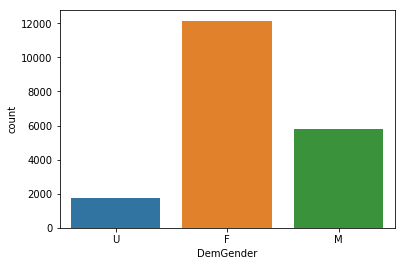

In [18]:
sns.countplot(x='DemGender',data=data)
print(st.mode(data.DemGender))

In [19]:
# Impute missing valuse in "DemGender" by "F" because "F" is mode  
data['DemGender']=data['DemGender'].fillna('F')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


South East


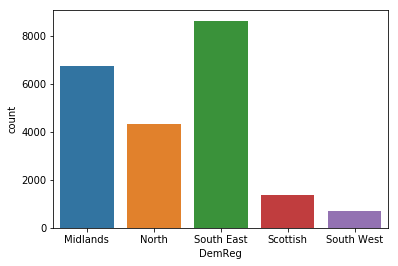

In [20]:
sns.countplot(x='DemReg',data=data)
print(st.mode(data.DemReg))

In [21]:
# Impute missing valuse in "DemGender" by "South East" because "South East" is mode  
data['DemReg']=data['DemReg'].fillna('South East')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


London


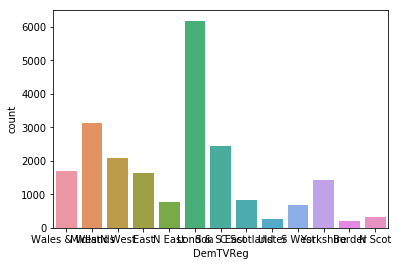

In [22]:
sns.countplot(x='DemTVReg',data=data)
print(st.mode(data.DemTVReg))

In [23]:
# Impute missing valuse in "DemTVReg" by "London" because "London" is mode  
data['DemTVReg']=data['DemTVReg'].fillna('London')

6.5646704949412085
5.0
5.0


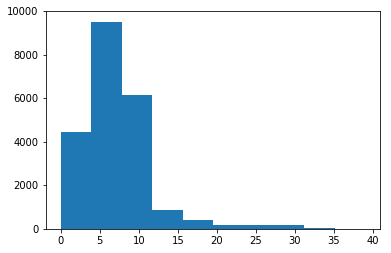

In [24]:

# plot histogram for PromTime 
import pylab
pylab.figure()
pylab.hist(data.PromTime[~np.isnan(data.PromTime)]) # avoide NA values
pylab.show

# find mean, median and mode also
import statistics as st
print(st.mean(data.PromTime[~np.isnan(data.PromTime)]))
print(st.median(data.PromTime[~np.isnan(data.PromTime)]))
print(st.mode(data.PromTime[~np.isnan(data.PromTime)]))

In [25]:
# Impute missing valuse in "PromTime" by median 
median_value_PromTime=(st.median(data.PromTime[~np.isnan(data.PromTime)]))
data['PromTime']=data['PromTime'].fillna(median_value_PromTime)

In [26]:
# Missing value 
data.isnull().sum()

ID                 0
DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
PromSpend          0
PromTime           0
TargetBuy          0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


0


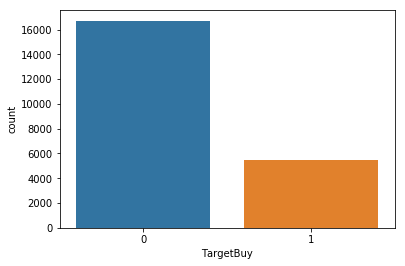

In [27]:
sns.countplot(x='TargetBuy',data=data)
print(st.mode(data.TargetBuy))

In [28]:
# indexes: X contain all Dependent Variable and Y contain all Independent Variable 
X = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9,]]
Y = data.iloc[:, 10]

In [29]:
X.head(5)

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,10.0,76.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0
1,4.0,49.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0
2,5.0,70.0,D,F,Midlands,Wales & West,Silver,0.02,8.0
3,10.0,65.0,F,M,Midlands,Midlands,Tin,0.01,7.0
4,11.0,68.0,A,F,Midlands,Midlands,Tin,0.01,8.0


In [30]:
Y.head(5)

0    0
1    0
2    1
3    1
4    0
Name: TargetBuy, dtype: int64

In [31]:
# Encoding categorical data
DemClusterGroup = pd.get_dummies(X['DemClusterGroup'], prefix = 'DemClusterGroup')
DemClusterGroup.drop('DemClusterGroup_A', inplace = True, axis=1)

DemGender = pd.get_dummies(X['DemGender'], prefix = 'DemGender')
DemGender.drop('DemGender_M', inplace = True, axis=1)

DemReg = pd.get_dummies(X['DemReg'], prefix = 'DemReg')
DemReg.drop('DemReg_Midlands', inplace = True, axis=1)

DemTVReg = pd.get_dummies(X['DemTVReg'], prefix = 'DemTVReg')
DemTVReg.drop('DemTVReg_Wales & West', inplace = True, axis=1)

PromClass = pd.get_dummies(X['PromClass'], prefix = 'PromClass')
PromClass.drop('PromClass_Gold', inplace = True, axis=1)

In [32]:
X.drop(['DemClusterGroup', 'DemGender','DemReg','DemTVReg','PromClass'],axis=1,inplace=True)
X = pd.concat([X, DemClusterGroup, DemGender, DemReg, DemTVReg, PromClass],axis=1)

C:\Users\Rohit\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
X.head(5)

,DemAffl,DemAge,PromSpend,PromTime,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_D,DemClusterGroup_E,DemClusterGroup_F,DemClusterGroup_U,...,DemTVReg_N East,DemTVReg_N Scot,DemTVReg_N West,DemTVReg_S & S East,DemTVReg_S West,DemTVReg_Ulster,DemTVReg_Yorkshire,PromClass_Platinum,PromClass_Silver,PromClass_Tin
0,10.0,76.0,16000.00,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,49.0,6000.00,5.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,70.0,0.02,8.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10.0,65.0,0.01,7.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,11.0,68.0,0.01,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
Y.head(5)

0    0
1    0
2    1
3    1
4    0
Name: TargetBuy, dtype: int64

## Split data into train and test

In [35]:
# Splitting the data 
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
X_train.head(10)

,DemAffl,DemAge,PromSpend,PromTime,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_D,DemClusterGroup_E,DemClusterGroup_F,DemClusterGroup_U,...,DemTVReg_N East,DemTVReg_N Scot,DemTVReg_N West,DemTVReg_S & S East,DemTVReg_S West,DemTVReg_Ulster,DemTVReg_Yorkshire,PromClass_Platinum,PromClass_Silver,PromClass_Tin
2162,19.0,34.0,5050.00,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21767,7.0,54.0,5924.64,14.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
127,10.0,72.0,11105.32,8.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5816,7.0,44.0,3000.00,6.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12430,9.0,56.0,2800.00,8.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9250,5.0,69.0,25158.67,16.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20024,11.0,54.0,5000.01,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10411,7.0,70.0,4800.00,7.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7479,12.0,49.0,50.01,8.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21940,6.0,77.0,18000.00,11.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_test.head(10)

,DemAffl,DemAge,PromSpend,PromTime,DemClusterGroup_B,DemClusterGroup_C,DemClusterGroup_D,DemClusterGroup_E,DemClusterGroup_F,DemClusterGroup_U,...,DemTVReg_N East,DemTVReg_N Scot,DemTVReg_N West,DemTVReg_S & S East,DemTVReg_S West,DemTVReg_Ulster,DemTVReg_Yorkshire,PromClass_Platinum,PromClass_Silver,PromClass_Tin
17281,6.0,43.0,0.01,11.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
18664,5.0,42.0,2000.00,8.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8152,10.0,52.0,523.95,10.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5333,8.0,49.0,0.01,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3302,8.0,41.0,0.01,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
14928,8.0,43.0,0.01,9.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6798,8.0,30.0,0.01,5.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
19301,4.0,63.0,0.01,4.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4435,4.0,77.0,6000.00,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19266,9.0,32.0,0.01,8.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
Y_train.head(10)

2162     1
21767    1
127      0
5816     0
12430    0
9250     0
20024    0
10411    0
7479     0
21940    0
Name: TargetBuy, dtype: int64

In [39]:
Y_test.head(10)

17281    0
18664    0
8152     0
5333     0
3302     0
14928    0
6798     1
19301    0
4435     1
19266    0
Name: TargetBuy, dtype: int64

## Logistic Regression model

In [40]:
# Logistic regression 
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
# prediction
y_pred = classifier.predict(X_test)

In [42]:
print(list(y_pred))

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [43]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=Y_train, cv=10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()
print(accuracies,
      model_accuracy,
      model_standard_deviation )

[0.79808774 0.8143982  0.80821147 0.79077615 0.80539933 0.80821147
 0.80089989 0.80202475 0.79741137 0.80135059] 0.8026770957231923 0.0063389247489144375


In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,3220,158,3378
1,702,365,1067
All,3922,523,4445


In [45]:
print ("train Accuaracy: ", classifier.score(X_train, Y_train)) #on the training data
#Check accuracy on test
print ("test Accuaracy: ", classifier.score(X_test,Y_test)) #on the test data

train Accuaracy:  0.80329620879739
test Accuaracy:  0.8065241844769404


In [46]:
# precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.95      0.88      3378
          1       0.70      0.34      0.46      1067

avg / total       0.79      0.81      0.78      4445



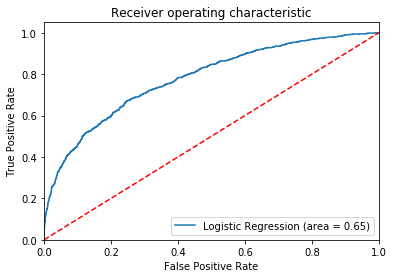

In [47]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [49]:
# prediction
y_pred1 = classifier1.predict(X_test)

In [50]:
print(list(y_pred1))

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

In [51]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(Y_test, y_pred1)
pd.crosstab(Y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2691,687,3378
1,592,475,1067
All,3283,1162,4445


In [52]:
print ("train Accuaracy1: ", classifier1.score(X_train, Y_train)) #on the training data
#Check accuracy on test
print ("test Accuaracy1: ", classifier1.score(X_test,Y_test)) #on the test data

train Accuaracy1:  0.9974125323433457
test Accuaracy1:  0.7122609673790776


In [53]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator=classifier1, X=X_train, y=Y_train, cv=10)
model_accuracy1 = accuracies1.mean()
model_standard_deviation1 = accuracies1.std()
print(accuracies1,
      model_accuracy1,
      model_standard_deviation1 )

[0.70416198 0.72778403 0.73228346 0.70978628 0.7215973  0.70978628
 0.71541057 0.712036   0.72144063 0.72087788] 0.7175164408613246 0.00836159527938637


In [54]:
# Root Mean Square Error 
from sklearn.metrics import mean_squared_error
final_predictions = classifier.predict(X_test)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

0.4398588586388361


In [55]:
# precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.82      0.80      0.81      3378
          1       0.41      0.45      0.43      1067

avg / total       0.72      0.71      0.72      4445



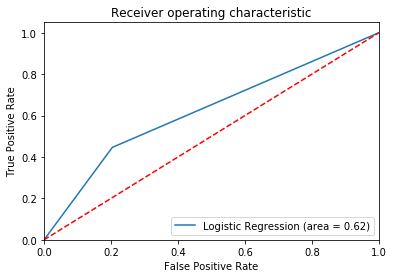

In [56]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(Y_test, classifier1.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## Random Forest 

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators= 10, criterion ='entropy', random_state = 0)
classifier2.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
# prediction
y_pred2 = classifier2.predict(X_test)

In [59]:
print(list(y_pred2))

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(Y_test, y_pred2)
pd.crosstab(Y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,3104,274,3378
1,687,380,1067
All,3791,654,4445


In [61]:
print ("train Accuaracy2: ", classifier2.score(X_train, Y_train)) #on the training data
#Check accuracy on test
print ("test Accuaracy2: ", classifier2.score(X_test,Y_test)) #on the test data

train Accuaracy2:  0.977331533355833
test Accuaracy2:  0.7838020247469066


In [62]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator=classifier2, X=X_train, y=Y_train, cv=10)
model_accuracy2 = accuracies2.mean()
model_standard_deviation2 = accuracies2.std()
print(accuracies2,
      model_accuracy2,
      model_standard_deviation2 )

[0.78515186 0.79415073 0.77896513 0.77502812 0.79527559 0.77952756
 0.7784027  0.79246344 0.778278   0.78897017] 0.7846213300433675 0.007168635723155672


In [63]:
# Root Mean Square Error 
from sklearn.metrics import mean_squared_error
final_predictions2 = classifier2.predict(X_test)
final_mse2 = mean_squared_error(Y_test, final_predictions2)
final_rmse2 = np.sqrt(final_mse2)
print(final_rmse2)

0.4649709402243256


In [64]:
# precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87      3378
          1       0.58      0.36      0.44      1067

avg / total       0.76      0.78      0.76      4445



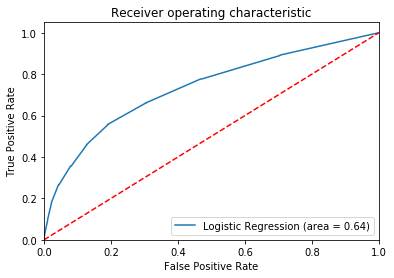

In [65]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(Y_test, classifier2.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()